# 1. 데이터마트

##1) 데이터 마트
#### 데이터 웨어하우스로부터 특정 사용자가 관심을 갖는 데이터들을 주제별，부서별로 추출하여 모은 비교적 작은 규모의 데이터 웨어하우스(데이터 창고)다.

## 2) 데이터 마트 개발
#### 분석 목적별， 주제별， 부서별로 데이터를 수집하고 변형하여 한 곳에 모으는 작업

## 3) 데이터 마트 개발을 위한 데이터 전처리
#### 원하는 데이터를 수집하고 변형하여 적재했다면(데이터 마트를 개발했다면)， 이제 전처리 단계를 거쳐야 한다.

<h3><dl><dt>(1) 데이터 정제 과정</dt>
<dd><li>결측값 처리</li></dd>
<dd><li>이상값 처리</li></dd>
<dt>(2) 분석 변수 처리 과정</dt>
<dd><li>변수 선택</li></dd>
<dd><li>차원 축소</li></dd>
<dd><li>요약변수 생성</li></dd>
<dd><li>파생변수 생성</li></dd>
<dd><li>변수 변환</li></dd>
<dd><li>클래스 불균형(불균형 데이터)처리</li></dd>

</dl>
</h3>


<h3>
<ol><li>요약변수: 원래의 데이터로부터 기본적인 통계 자료를 추출한 변수
<ul><li>(총 합계，평균, 횟수，성별 구분 등)</li></ul></li>
<li>파생변수 생성: 특정한 목적을 갖고 조건을 만족하는 변수들을 새롭게 생성한 것을 의미
<ul>
<li>특정 매장의 월별 합계</li>
<li>특정 기간 남성 고객의 구매 총액</li>
</ul>
</li>
</ol>
</h3>

# 2. 데이터 마트 개발을 위한 R 패키지 활용

<h2>
<ol>
<li>reshape 패키지 *** : melt, cast 데이터 컬럼 조작</li>
<li>plyr 패키지 *** : apply 함수를 기반으로 데이터를 분리하고 다시 결합</li>
<li>data.table 패키지 * : 데이터프레임보다 4-100배에 빠른 속도</li>
<li>sqldf 패키지: 표준 SQL 문장을 활용하여 R에서 데이터프레임을 조작</li>
</ol>
</h2>

## 1) reshape 패키지 *** : melt, cast 데이터 컬럼 조작

In [1]:
# reshape가 설치 안될 경우 reshape2를 사용
install.packages('reshape') 
library(reshape)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’




In [2]:
score<-data.frame(
  student_number = c(1,2,1,2),
  semester = c(1,1,2,2),
  math_score = c(60,90,70,90),
  english_score = c(80,70,40,60)
)
score

student_number,semester,math_score,english_score
<dbl>,<dbl>,<dbl>,<dbl>
1,1,60,80
2,1,90,70
1,2,70,40
2,2,90,60


### melt() ‘녹이다’라는 뜻의 melt 힘수는 데이터를 특정 변수를 기준으로 녹여서 나머지 변수에 대한 세분화 된 데이터를 만들 수 있다.

In [3]:
melted_score <- melt(score,id=c('student_number','semester'))
melted_score

student_number,semester,variable,value
<dbl>,<dbl>,<fct>,<dbl>
1,1,math_score,60
2,1,math_score,90
1,2,math_score,70
2,2,math_score,90
1,1,english_score,80
2,1,english_score,70
1,2,english_score,40
2,2,english_score,60


### cast 함수: 주조하다’라는 의미의 cast 함수는 melt에 의해 녹은 데이터를 요약을 위해 새롭게 가공할 수 있게 도와준다.

In [4]:
# 학생별 과목의 평균점수를 알고 싶은 경우
cast_score <- cast(melted_score,student_number ~ variable , mean)
cast_score

,student_number,math_score,english_score
,<dbl>,<dbl>,<dbl>
1,1,65,60
2,2,90,65


In [5]:
# 학기별 과목의 평균점수를 알고싶은 경우
cast_score <- cast(melted_score,semester ~ variable , mean)
cast_score

,semester,math_score,english_score
,<dbl>,<dbl>,<dbl>
1,1,75,75
2,2,80,50


In [7]:
# 학생별 최대점수를 알고싶은 경우
cast_score <- cast(melted_score,student_number ~ variable , max)
cast_score

,student_number,math_score,english_score
,<dbl>,<dbl>,<dbl>
1,1,70,80
2,2,90,70


## 2) plyr 패키지 ***  
#### apply 함수를 기반으로 데이터를 분리하고 다시 결합

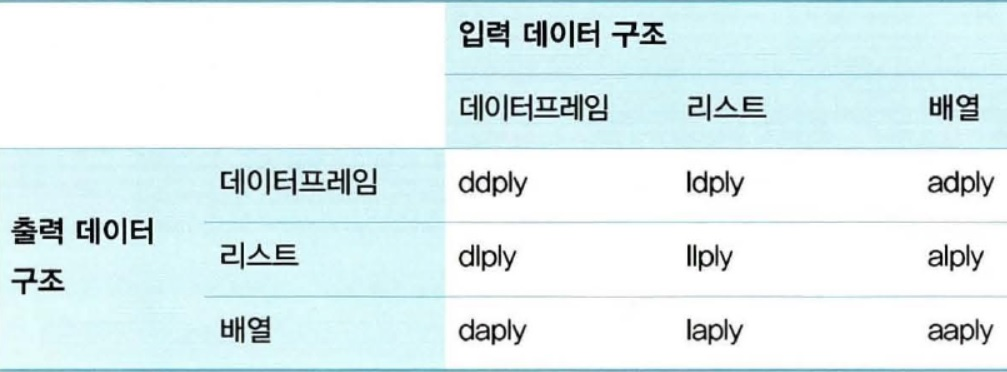

In [8]:
install.packages('plyr') 
library(plyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘plyr’


The following objects are masked from ‘package:reshape’:

    rename, round_any




In [9]:
score<-data.frame(
  class = c('A','A','B','B'),
  math = c(60,90,70,90),
  english = c(80,70,40,60)
)
score

class,math,english
<chr>,<dbl>,<dbl>
A,60,80
A,90,70
B,70,40
B,90,60


### summarise 데이터 요약

In [10]:
# summarise는 데이터 요약
ddply(score,"class",summarise,math_avg=mean(math),eng_avg=mean(english))

class,math_avg,eng_avg
<chr>,<dbl>,<dbl>
A,75,75
B,80,50


### transform 기존 데이터에 추가

In [11]:
# transform은 기존 데이터에 추가
ddply(score,"class",transform,math_avg=mean(math),eng_avg=mean(english))

class,math,english,math_avg,eng_avg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
A,60,80,75,75
A,90,70,75,75
B,70,40,80,50
B,90,60,80,50


In [12]:
data<-data.frame(
  year=rep(2012:2013,each=4),
  month = c(1,1,2,2,1,1,2,2),
  value = c(3,5,7,9,1,5,4,6)
)
data

year,month,value
<int>,<dbl>,<dbl>
2012,1,3
2012,1,5
2012,2,7
2012,2,9
2013,1,1
2013,1,5
2013,2,4
2013,2,6


In [13]:
# 기준 변수를 2개 이상 설정 가능
ddply(data,c('year','month'),summarise,value_avg = mean(value))

year,month,value_avg
<int>,<dbl>,<dbl>
2012,1,4
2012,2,8
2013,1,3
2013,2,5


In [14]:
# 사용자 함수를 정의 가능
ddply(data,c('year','month'),function(x){
  value_avg = mean(x$value)
  value_sd = sd(x$value)
  data.frame(avg_sd = value_sd/value_avg)
})

year,month,avg_sd
<int>,<dbl>,<dbl>
2012,1,0.3535534
2012,2,0.1767767
2013,1,0.9428090
2013,2,0.2828427


## 3) data. table 패키지
### 데이터프레임과 유사하지만 특정 칼럼별로 주솟값을 갖는 인텍스를 생성하여 연산 및 검색을 빠르게 수행할수 있는 데이터 구조
### 기존 데이터프레임보다 적게는 4배에서 크게는 100배에 가까운 빠른 속도로 데이터를 탐색，연산，정렬，병합할 수 있게 한다.

In [15]:
install.packages('data.table') 
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following object is masked from ‘package:reshape’:

    melt




In [16]:
year<-rep(2012:2015,each=12000000)
month<-rep(rep(1:12,each=1000000),4)
value<-runif(48000000)

In [17]:
df1<-data.frame(year,month,value)
dt1<-as.data.table(df1)

In [18]:
head(df1)

,year,month,value
,<int>,<int>,<dbl>
1,2012,1,0.50898094
2,2012,1,0.47176582
3,2012,1,0.12507453
4,2012,1,0.15410432
5,2012,1,0.79274065
6,2012,1,0.05627603


In [19]:
head(dt1)

year,month,value
<int>,<int>,<dbl>
2012,1,0.50898094
2012,1,0.47176582
2012,1,0.12507453
2012,1,0.15410432
2012,1,0.79274065
2012,1,0.05627603


In [20]:
# 데이터 프레임 검색 시간 측정
system.time(df1[df1$year==2012,])
system.time(dt1[dt1$year==2012,])

   user  system elapsed 
  1.318   0.320   1.640 

   user  system elapsed 
  0.256   0.049   0.305 

In [21]:
# 특정 컬럼을 키값으로 설정
setkey(dt1,year)

In [22]:
# 키값에 대하여 J표현식 사용하여 검색 시간 측정
system.time(dt1[J(2012)])


   user  system elapsed 
  0.155   0.001   0.156 

## 4) sqldf 패키지
### 표준 SQL 문장을 활용하여 R에서 데이터프레임을 다루는 것을 가능하게 해주는 패키지
### SAS에서 PROC SQL과 같은 역할을 한다.

In [23]:
install.packages('sqldf') 
library(sqldf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite



In [24]:
score<-data.frame(
  student_number = c(1,2,1,2),
  semester = c(1,1,2,2),
  math_score = c(60,90,70,90),
  english_score = c(80,70,40,60)
)
score

student_number,semester,math_score,english_score
<dbl>,<dbl>,<dbl>,<dbl>
1,1,60,80
2,1,90,70
1,2,70,40
2,2,90,60


In [25]:
sqldf('select * from score')

student_number,semester,math_score,english_score
<dbl>,<dbl>,<dbl>,<dbl>
1,1,60,80
2,1,90,70
1,2,70,40
2,2,90,60


In [26]:
sqldf('select * from score where student_number = 1')

student_number,semester,math_score,english_score
<dbl>,<dbl>,<dbl>,<dbl>
1,1,60,80
1,2,70,40


In [27]:
sqldf('select avg(math_score) as math_score, avg(english_score) as english_score from score group by student_number')

math_score,english_score
<dbl>,<dbl>
65,60
90,65
